In [10]:
#This is the code to create a predictive model for future demand.
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
from random import random
plt.style.use('fivethirtyeight')

NameError: name 'plt' is not defined

In [4]:
data = pd.read_csv('demand_data', low_memory=False)
data.head

<bound method NDFrame.head of        Unnamed: 0     time_block  pickup_zip passenger_count  \
0             NaN            NaN         NaN           count   
1             0.0            0.0         0.0          233691   
2             1.0  2016/01/01 00     10001.0            2908   
3             2.0  2016/01/01 00     10002.0            2140   
4             3.0  2016/01/01 00     10003.0            3106   
5             4.0  2016/01/01 00     10004.0              18   
6             5.0  2016/01/01 00     10005.0             236   
7             6.0  2016/01/01 00     10006.0             176   
8             7.0  2016/01/01 00     10007.0             318   
9             8.0  2016/01/01 00     10009.0            1662   
10            9.0  2016/01/01 00     10011.0            3410   
11           10.0  2016/01/01 00     10012.0            1986   
12           11.0  2016/01/01 00     10013.0             490   
13           12.0  2016/01/01 00     10014.0            1276   
14        

In [5]:
data = data.drop("Unnamed: 0", axis=1)
data.drop([0, 1])

,time_block,pickup_zip,passenger_count,passenger_count.1,tip_amount,tolls_amount,total_amount
2,2016/01/01 00,10001.0,2908,5372.0,4269.3,474.35999999999996,43727.05999999995
3,2016/01/01 00,10002.0,2140,4068.0,3598.8599999999997,32.32,32864.979999999974
4,2016/01/01 00,10003.0,3106,5734.0,4969.119999999998,222.30000000000007,44821.21999999997
5,2016/01/01 00,10004.0,18,40.0,4.0,0.0,242.39999999999998
6,2016/01/01 00,10005.0,236,460.0,497.2799999999999,11.08,4569.160000000002
7,2016/01/01 00,10006.0,176,324.0,398.56000000000006,33.24,3307.6
8,2016/01/01 00,10007.0,318,588.0,489.61999999999995,0.0,5122.02
9,2016/01/01 00,10009.0,1662,3020.0,3073.3199999999983,82.64,24190.559999999998
10,2016/01/01 00,10011.0,3410,6102.0,5409.459999999998,297.9200000000001,50558.47999999999
11,2016/01/01 00,10012.0,1986,3808.0,3176.1600000000003,87.47999999999999,30759.43999999997


In [6]:
print(data)

          time_block  pickup_zip passenger_count passenger_count.1  \
0                NaN         NaN           count               sum   
1                0.0         0.0          233691               0.0   
2      2016/01/01 00     10001.0            2908            5372.0   
3      2016/01/01 00     10002.0            2140            4068.0   
4      2016/01/01 00     10003.0            3106            5734.0   
5      2016/01/01 00     10004.0              18              40.0   
6      2016/01/01 00     10005.0             236             460.0   
7      2016/01/01 00     10006.0             176             324.0   
8      2016/01/01 00     10007.0             318             588.0   
9      2016/01/01 00     10009.0            1662            3020.0   
10     2016/01/01 00     10011.0            3410            6102.0   
11     2016/01/01 00     10012.0            1986            3808.0   
12     2016/01/01 00     10013.0             490             926.0   
13     2016/01/01 00

In [7]:
#Test Block
passengers10001 = data[data.pickup_zip == 10001.0]
passengers10001 = passengers10001.passenger_count
passengers10001 = [int(i) for i in passengers10001]

passengers10002 = data[data.pickup_zip == 10002.0]
passengers10002 = passengers10002.passenger_count
passengers10002 = [int(i) for i in passengers10002]

passengers10003 = data[data.pickup_zip == 10003.0]
passengers10003 = passengers10003.passenger_count
passengers10003 = [int(i) for i in passengers10003]


In [8]:

plt.plot(passengers10001)
plt.plot(passengers10002)
plt.plot(passengers10003)

NameError: name 'plt' is not defined

In [9]:
plt.plot(passengers10001)

NameError: name 'plt' is not defined

In [71]:
smol = passengers10001[0:24*7]
model = AR(smol)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(smol), len(smol))
print(yhat)

[1720.5708011]


In [74]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [78]:
#warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(smol,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2985.3685232705247
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2736.382042971588
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2665.8308952548255
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2346.5523880602877
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2669.8518997776764
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2545.0415955337494
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2237.473494548445
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2222.4267420705446
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2765.2341266047615
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2534.836833799815
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2480.4594253200967
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2185.3204100359
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2496.3873158993747
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2378.2183801253987
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2105.857997246737
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2069.3637781486586
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2465.6180026274915
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2281.005071777674


In [80]:
mod = sm.tsa.statespace.SARIMAX(smol,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9062      0.028    -31.828      0.000      -0.962      -0.850
ma.L1          0.9792      0.038     25.520      0.000       0.904       1.054
ar.S.L12      -0.8661      0.056    -15.350      0.000      -0.977      -0.756
ma.S.L12       0.1691      0.129      1.308      0.191      -0.084       0.422
sigma2      5.969e+04   5075.383     11.760      0.000    4.97e+04    6.96e+04


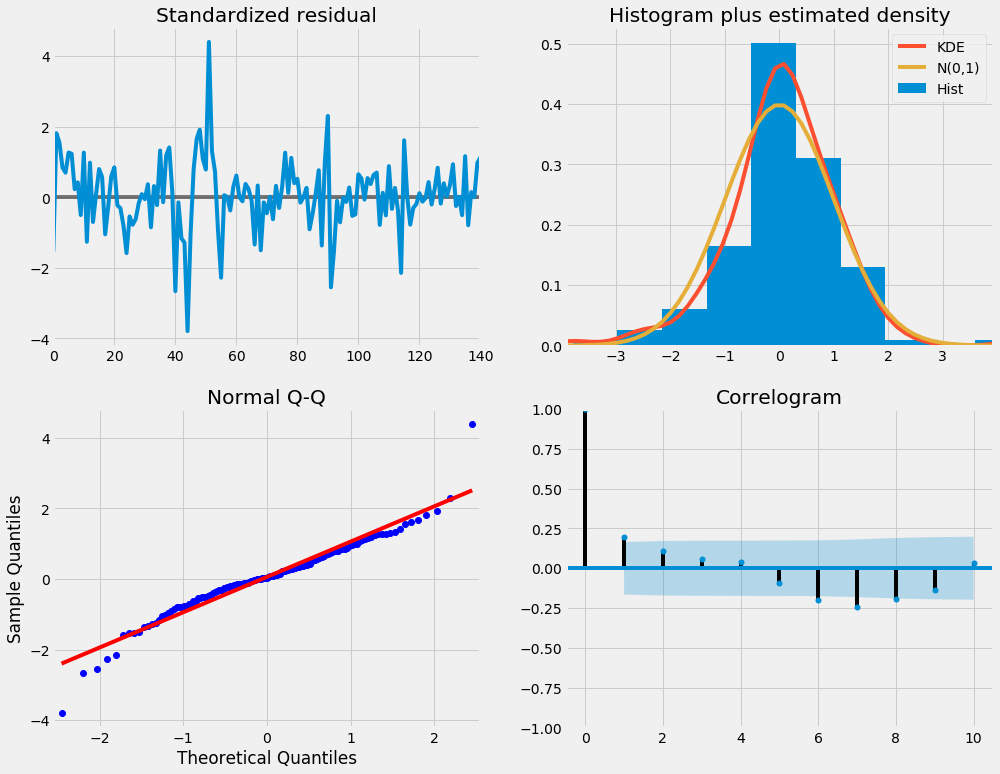

In [81]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [88]:
pred = results.get_prediction(start=pd.to_datetime('2016/01/01'), dynamic=False)
pred_ci = pred.conf_int()

<bound method SARIMAXResults.get_prediction of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x114cf9400>>


AttributeError: 'function' object has no attribute 'conf_int'

In [1]:

#LSTM

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
numpy.random.seed(7)


Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
numpy.random.seed(7)
x_train = [i for i in range(2893)] 
y_train = passengers10001

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

NameError: name 'passengers10001' is not defined

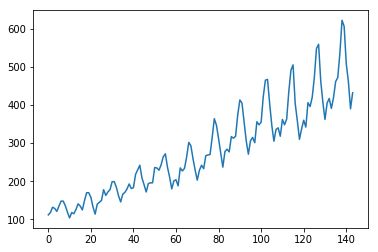

In [3]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [4]:
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [7]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [14]:
# create and fit the LSTM network
model = Sequential()
#model.add(LSTM(1, input_shape=(1, look_back)))
model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

TypeError: Expected int32, got list containing Tensors of type '_Message' instead.

In [3]:
python --version

NameError: name 'python' is not defined